In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

## SVM  (西瓜书)

### 原始问题

$$ \max_{\mathbf{w}, b} \frac{1}{\|\mathbf{w} \|} $$
st.
$$ y_i(\mathbf{w}x_i + b) \geq 1 \quad \text{for all $i$}$$

> 貌似最大化与 b 无关，但实际上通过约束条件起作用。若w的scale过小，则约束条件不满足

### 拉格朗日对偶问题

$$ \max L(\alpha, \mathbf{w}, b) = \frac{1}{2} \|w\| ^2 + \sum_i \alpha_i(1 - y_i(\mathbf{w x_i} + b)) $$

对 $L$ 求关于 $w, b$ 的导数，令其等于0

$$ \frac{\partial L}{\partial \mathbf{w}} = ... = 0, \quad \frac{\partial L}{\partial b} = ... = 0$$
 
带入回L，经过一通不太复杂的计算，得到原问题的对偶问题：

$$ \max_\alpha L(\alpha) = \sum_i \alpha_i - \frac{1}{2} \sum_i \sum_z \alpha_i y_i \alpha_z y_z \mathbf{x_i^T x_z}$$
st. 
$$\sum_i y_i \alpha_i = 0$$
$$ \alpha_i > 0 $$

### 核函数

映射 $\phi(\cdot)$ 将原始输入映射到高维甚至无穷维特征空间，因此原优化问题变为

$$ \max_\alpha \sum_i \alpha_i - \frac{1}{2} \sum_i \sum_z \alpha_i y_i \alpha_z y_z \mathbf{\phi(x_i)^T \phi(x_z)} $$

但是求 $\phi(\cdot)$ 的具体形式是很难的（一是很难求出$\phi$的具体形式，二是映射后的维度非常高甚至是无穷维，计算量太大），于是引入**核函数**的概念

$$ \kappa(x, z) = \phi(x) \cdot \phi(x) $$

> 核技巧的想法是，只定义核函数K, 而不显示定义映射函数$\phi$

什么样的函数能做核函数呢？半正定

### 软间隔

不要求所有的样本都满足 $y_i(w x_i + b) > 1$, 对不满足的样本，施加**合页（hinge）损失函数**惩罚

$$ \min_w \frac{1}{2} \|w\|^2 + C \sum_i max[0, 1 - y_i(w x_i + b)]$$

引入**松弛变量（slack var）** 上式可改写为

$$ \min_w \frac{1}{2} \|w\|^2 + C \sum_i \xi_i $$
$$ y_i(w x_i + b) >= 1 - \xi_i $$
$$ \xi_i >= 0$$

解：拉格朗日函数 -> 对w, b求导，令等于0 -> 代回原式，化简得到原问题的对偶形式


$$ \max_\alpha L(\alpha) = \sum_i \alpha_i - \frac{1}{2} \sum_i \sum_z \alpha_i y_i \alpha_z y_z \mathbf{x_i^T x_z}$$
st. 
$$\sum_i y_i \alpha_i = 0$$
$$ 0 <= \alpha_i <= C $$

唯一的区别在于 $\alpha_i <= C$

## SVR （西瓜书）

Regression


$$ \min_w \frac{1}{2} \|w\|^2 + C \sum_i \ell_\epsilon(y - f(x_i)) $$

here $\ell_\epsilon(\cdot)$ is $\epsilon$**-insensitive loss**:

$$ \ell_\epsilon(z) = \max(0, |z| - \epsilon) $$

即，若样本点在预测超平面的$\epsilon$-band内，loss = 0， 否则 loss = 到band的距离

解法： Lagrange function -> 求导，令其等于零 -> 整理得到关于alpha的一元最优化问题 -> KKT条件、意义

## SVM (Ng)

### Start from Logistic ... 

Logistic Regression Cost Function:

$$ L(\theta) = \sum_i y_i (-log(h_\theta(x_i))) + (1-y_i) (- log(1 - h_\theta(x_i))) $$

where $$h_\theta(x) = Sigmoid(wx+b)$$ ie. y_score

**<u>Modifying Logistic cost funciton we got SVM cost funciton:</u>**

$$ L(\theta) = \sum_i y_i cost_1({\bf \theta^T x}) + (1 - y_i) cost_0({\bf \theta^T x})$$

### Change cost funciton to **hinge loss function**, l2 panelty and set C very large ...

logistic with penalty:

$$ L(\theta) = C \sum_i y_i cost_1(\theta^T x) + (1 - y_i) cost_0(\theta^T x) + \frac{1}{2} \|\theta\|$$ 

<u> what if is $C$ is very large ? </u>

$cost_1(..)$ and $cost_0(..)$ must be very close to zero, <u>that is, all samle i is correctly predicted</u>, and then minimize $\|\theta\|$

$$\min \frac{1}{2} \|\theta\|^2$$

$$\theta^T x >= 1 \quad \text{for all} y_i = 1$$
$$\theta^T x <= -1 \quad \text{for all} y_i = 0$$

### how it is related to "large margin", in graph

图见笔记

向量内积的几何意义：“投影”

### Kernel

"similarity"

$$ K(x, l) = Similarity(x, landmark) = \exp(\frac{\|x - l \|^2}{2\sigma^2})$$

$\sigma$ is "bandwidth"

use all sample i as landmark

## Review of Logistic Regression Cost Function

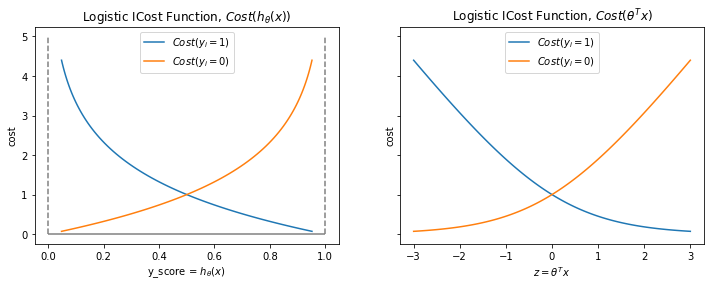

In [2]:
z = np.linspace(-3, 3, 100)  # z = theta * x

def y_score(z):
    return 1 / (1 + np.exp(-z))

cost1 = -np.log2(y_score(z))
cost0 = -np.log2(1 - y_score(z))


fig, axs = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

ax = axs[1]
ax.plot(z, cost1, label=r'$Cost(y_i=1)$')
ax.plot(z, cost0, label=r'$Cost(y_i=0)$')
ax.legend()
ax.set_xlabel(r'$z = \theta^T x$')
ax.set_ylabel('cost')
ax.set_title(r'Logistic ICost Function, $Cost(\theta^T x)$')


ax = axs[0]
ax.plot(y_score(z), cost1, label=r'$Cost(y_i=1)$')
ax.plot(y_score(z), cost0, label=r'$Cost(y_i=0)$')
ax.vlines([0.0, 1.0], ymin=0, ymax=5, color='grey', linestyles='dashed')
ax.hlines([0.0], xmin=0.0, xmax=1.0, color='grey')
ax.set_xlabel(r'y_score = $h_\theta(x)$')
ax.set_ylabel('cost')
ax.legend()
ax.set_title(r'Logistic ICost Function, $Cost(h_\theta(x))$')

plt.show()

## Perception,Logistic, SVM

>  https://blog.csdn.net/m0_37786651/article/details/61614865

三者CostFunction的不同：

$$ Perception\_Cost = \sum_i [ - y_i(w x_i + b)]^+$$
$$ SVM\_Cost = \sum_i [1 - y_i(w x_i + b)]^+$$

$$ y_i \in \{-1, 1\}$$

$$ Logistic\_Cost = \sum_i y_i log(h_\theta(x)) + (1 - y_i) log(1 - h_\theta(x))$$

$$ y_i \in \{0, 1\}$$


Perception ---- margin -----> SVM

几种 cost function 画图对比

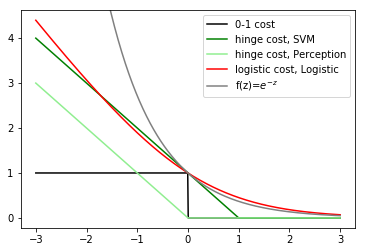

In [3]:
z = np.linspace(-3, 3, 600)

def cost_01(z):
    return (z <= 0).astype(int)

def cost_SVM(z):
    return np.fmax(0, 1 - z)

def cost_Perception(z):
    return np.fmax(0, -z)

def cost_Logistic(z):
    return -np.log2(1 / (1 + np.exp(-z)))


fig, ax = plt.subplots()

ax.plot(z, cost_01(z), label=r'0-1 cost', color='k')
ax.plot(z, cost_SVM(z), label=r'hinge cost, SVM', color='green')
ax.plot(z, cost_Perception(z), label=r'hinge cost, Perception', color='lightgreen')
ax.plot(z, cost_Logistic(z), label=r'logistic cost, Logistic', color='red')
a, b = ax.get_ylim()
ax.plot(z, np.exp(-z), label=r'f(z)=$e^{-z}$', color='grey')
ax.set_ylim(a, b)
ax.legend()

## iris Data

In [4]:
from sklearn.datasets import load_iris
import pandas as pd

In [62]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df = df[df.target != 2]

X = df.iloc[:, 2:4].values
y = df['target'].values

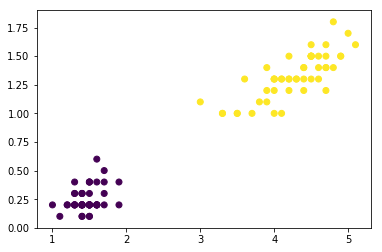

In [63]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [64]:
from sklearn.svm import LinearSVC, SVC

In [65]:
m0 = LinearSVC(loss='hinge', C=1000)   # C is very larege, hard margin
m1 = LinearSVC(loss='hinge', C=1)  # default C is 1, soft margin

m0.fit(X, y)
m1.fit(X, y)

m0.decision_function(X)  # signed distance to hyperplane, confidence score

signed_distance_0 = m0.decision_function(X)
suport_vector_idx_0 = np.nonzero(np.abs(np.abs(signed_distance_0) - 1) <= 0.01)[0]

signed_distance_1 = m1.decision_function(X)
suport_vector_idx_1 = np.nonzero(np.abs(np.abs(signed_distance_1) - 1) <= 0.01)[0]

print('-------------- model 0, hard margin, support vector: ----------')
print(signed_distance_0[suport_vector_idx_0])
print(suport_vector_idx_0)

print('-------------- model 1, soft margin, support vector: ----------')
print(signed_distance_1[suport_vector_idx_1])
print(suport_vector_idx_1)

-------------- model 0, hard margin, support vector: ----------
[-0.99997195 -1.0000466   1.        ]
[43 44 98]
-------------- model 1, soft margin, support vector: ----------
[-0.99438596  1.          1.        ]
[26 60 79]


In [66]:
np.unique(y)

array([0, 1])

Text(0.5, 1.0, 'Linear SVC, soft')

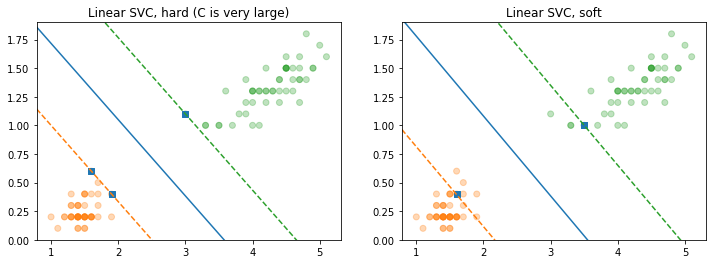

In [67]:
def abline_y_values(w1, w2, b, x_values):
    """
    convert hyperplane (w, b) to abline y = kx + b
    """
    slope = - w1 / w2
    intercept = - b / w2
    y_values = x_values * slope + intercept
    return x_values, y_values


fig, axs = plt.subplots(1, 2, figsize=(12, 4))

y_values = np.unique(y)
color_map = {y_values[0]: 'C1', y_values[1]:'C2'}
color_vector = [color_map[i] for i in y]

for i in range(2):
    axs[i].scatter(X[:, 0], X[:, 1], color=color_vector, alpha=0.3)

# LinearSVC, hard -------------------------------------------------
ax = axs[0]
xlim, ylim = ax.get_xlim(), ax.get_ylim()
xlim_arr = np.asarray(xlim)
    
w1 = m0.coef_[0][0]
w2 = m0.coef_[0][1]
b = m0.intercept_[0]

hyper_x, hyper_y = abline_y_values(w1, w2, b, xlim_arr)
hyper_x_pos, hyper_y_pos = abline_y_values(w1, w2, b + 1, xlim_arr)
hyper_x_neg, hyper_y_neg = abline_y_values(w1, w2, b - 1, xlim_arr)

ax.plot(hyper_x, hyper_y)
ax.plot(hyper_x_pos, hyper_y_pos, linestyle='dashed')
ax.plot(hyper_x_neg, hyper_y_neg, linestyle='dashed')
ax.scatter(X[suport_vector_idx_0, 0], X[suport_vector_idx_0, 1], marker='s')

ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_title('Linear SVC, hard (C is very large)')

# LinearSVC, soft -------------------------------------------------
ax = axs[1]
xlim, ylim = ax.get_xlim(), ax.get_ylim()
xlim_arr = np.array([xlim[0], xlim[1]])

w1 = m1.coef_[0][0]
w2 = m1.coef_[0][1]
b = m1.intercept_[0]
hyper_x, hyper_y = abline_y_values(w1, w2, b, xlim_arr)
margin_x_pos, margin_y_pos = abline_y_values(w1, w2, b + 1, xlim_arr)
margin_x_neg, margin_y_neg = abline_y_values(w1, w2, b - 1, xlim_arr)

ax.plot(hyper_x, hyper_y)
ax.plot(margin_x_pos, margin_y_pos, linestyle='dashed')
ax.plot(margin_x_neg, margin_y_neg, linestyle='dashed')
ax.scatter(X[suport_vector_idx_1, 0], X[suport_vector_idx_1, 1], marker='s')

ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_title('Linear SVC, soft')